<a href="https://colab.research.google.com/github/eluzuriaga83/data_science_bootcamp/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://dlcdn.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"


import findspark
findspark.init()
findspark.find()

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [976 kB]
Ge

'/usr/local/lib/python3.10/dist-packages/pyspark'

In [ ]:
import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
from pyspark.sql.functions import split, trim
from pyspark.sql.functions import col,desc
from pyspark.sql.functions import col, count, when

In [ ]:
#initializing spark
spark= SparkSession \
       .builder \
       .appName("BootCampEspol") \
       .getOrCreate()

spark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install Unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
dfmovies = spark.read.csv('/content/drive/MyDrive/Proyecto-6/movies_critic_pandas.csv', header=True, inferSchema=True)

In [ ]:
dfmovies.show(5)

+--------------------+--------------------+--------------------+------------+------------------+--------------------+-----------+------------+--------------+-----------+--------------+--------------------+------------+
|            movie_id|               quote|       criticPageUrl|creationDate|        criticName|          movieTitle|reviewState|critic_score|audience_score|isTopCritic|scoreSentiment|     publicationName|rating_fixed|
+--------------------+--------------------+--------------------+------------+------------------+--------------------+-----------+------------+--------------+-----------+--------------+--------------------+------------+
|16db6b7e-176a-3a4...|Terry Gilliam's t...|/critics/jonathan...|  1800-01-01|Jonathan Rosenbaum|The Adventures of...|      fresh|        90.0|          82.0|       True|      POSITIVE|      Chicago Reader|          PG|
|34bf7e79-d110-3b3...|Weir, working fro...|/critics/owen-gle...|  1800-01-01|   Owen Gleiberman|            Fearless|      f

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer


stop_words_list = stopwords.words('spanish')
tokenizer = RegexpTokenizer(r'\w+')

from unidecode import unidecode


# Function to remove accents using unidecode
def remove_accents(text):
   if isinstance(text, str):
       return unidecode(text)
   else:
       return text


def remove_punctuation(text):
 local_tokens = tokenizer.tokenize(text)
 return " ".join(local_tokens)


def process_text(text):
   text = text.lower()
   text = re.sub(r"(https?)\S+","",text)#remove urls
   text = re.sub(r"(\B#)\w*","",text)#remove hashtags
   text = re.sub(r"(\B@)\w*","",text)#remove mentions
   text = re.sub(r'[/(){}\[\]\|@,;]',"",text)
   text = re.sub(r"'[^\w\s]'","",text)
   text = re.sub("\n","",text)#remove lines separate
   return text


def remove_stopwords(text):
 tokens = text.split(" ")
 tokens = [token for token in tokens if token not in stop_words_list]#remove stopwords
 return " ".join(tokens)

In [ ]:
df_top20_fresh =  dfmovies.filter(F.col("reviewState") == "fresh").groupBy(["movie_id","movieTitle"]).count().orderBy(F.desc("count")).limit(20)
df_top20_fresh.show(5)

+--------------------+--------------------+-----+
|            movie_id|          movieTitle|count|
+--------------------+--------------------+-----+
|3c93634e-221c-3bc...|Three Billboards ...|  738|
|94813ccb-6c7d-3e0...|           Star Trek|  652|
|fa576136-17af-33b...|                 Tár|  644|
|f5859e9a-bd84-374...|        Finding Dory|  624|
|2b543959-3a30-39b...|      Sound of Metal|  554|
+--------------------+--------------------+-----+
only showing top 5 rows



In [ ]:
# 20 TOP peliculas que son calificadas como fresh
df_top20_rotten =  dfmovies.filter(F.col("reviewState") == "rotten").groupBy(["movie_id","movieTitle"]).count().orderBy(F.desc("count")).limit(20)
df_top20_rotten.show(5)

+--------------------+--------------------+-----+
|            movie_id|          movieTitle|count|
+--------------------+--------------------+-----+
|19ee8772-dda0-391...|      Fantastic Four|  468|
|10d00115-4fc0-3c2...|    Assassin's Creed|  368|
|e99509a8-7c1b-33d...|The Girl on the T...|  334|
|0e105a31-3528-4a8...|      Halloween Ends|  318|
|7f01ccbe-dc90-30e...|        Bullet Train|  316|
+--------------------+--------------------+-----+
only showing top 5 rows



In [ ]:
df_top20_fresh_join = df_top20_fresh.join(dfmovies, ["movie_id", "movieTitle"], "inner")
df_top20_fresh_join.show(5)


+--------------------+----------+-----+--------------------+--------------------+------------+---------------+-----------+------------+--------------+-----------+--------------+---------------+------------+
|            movie_id|movieTitle|count|               quote|       criticPageUrl|creationDate|     criticName|reviewState|critic_score|audience_score|isTopCritic|scoreSentiment|publicationName|rating_fixed|
+--------------------+----------+-----+--------------------+--------------------+------------+---------------+-----------+------------+--------------+-----------+--------------+---------------+------------+
|94813ccb-6c7d-3e0...| Star Trek|  652|Script: tick. Cas...|/critics/louise-k...|  2009-04-07|  Louise Keller|      fresh|        94.0|          91.0|      False|      POSITIVE| Urban Cinefile|       PG-13|
|94813ccb-6c7d-3e0...| Star Trek|  652|Script: tick. Cas...|/critics/louise-k...|  2009-04-07|  Louise Keller|      fresh|        94.0|          91.0|      False|      POSI

In [ ]:
#removiendo duplicados
df_filtered_fresh = df_top20_fresh_join.dropDuplicates(["movie_id","criticName","quote"])


In [ ]:
df_filtered_fresh.show(5)

+--------------------+------------+-----+--------------------+--------------------+------------+---------------+-----------+------------+--------------+-----------+--------------+--------------------+------------+
|            movie_id|  movieTitle|count|               quote|       criticPageUrl|creationDate|     criticName|reviewState|critic_score|audience_score|isTopCritic|scoreSentiment|     publicationName|rating_fixed|
+--------------------+------------+-----+--------------------+--------------------+------------+---------------+-----------+------------+--------------+-----------+--------------+--------------------+------------+
|00b00db9-cbfb-427...|On the Rocks|  490|Who among of us w...|    /critics/aa-dowd|  2020-09-28|      A.A. Dowd|      fresh|        87.0|          51.0|       True|      POSITIVE|             AV Club|           R|
|00b00db9-cbfb-427...|On the Rocks|  490|Like a strong dri...|/critics/adam-graham|  2020-10-02|    Adam Graham|      fresh|        87.0|       

In [ ]:
df_top20_rotten_join = df_top20_rotten.join(dfmovies, ["movie_id", "movieTitle"], "inner")
df_top20_rotten_join.show(5)

+--------------------+-------------+-----+--------------------+--------------------+------------+---------------+-----------+------------+--------------+-----------+--------------+---------------+------------+
|            movie_id|   movieTitle|count|               quote|       criticPageUrl|creationDate|     criticName|reviewState|critic_score|audience_score|isTopCritic|scoreSentiment|publicationName|rating_fixed|
+--------------------+-------------+-----+--------------------+--------------------+------------+---------------+-----------+------------+--------------+-----------+--------------+---------------+------------+
|56a6b923-582d-317...|Hide and Seek|  254|An elaborate equa...|/critics/ed-gonzalez|  2005-01-25|    Ed Gonzalez|     rotten|        12.0|          50.0|       True|      NEGATIVE| Slant Magazine|           R|
|56a6b923-582d-317...|Hide and Seek|  254|An elaborate equa...|/critics/ed-gonzalez|  2005-01-25|    Ed Gonzalez|     rotten|        12.0|          50.0|       

In [ ]:
#removiendo duplicados
df_filtered_rotten = df_top20_rotten_join.dropDuplicates(["movie_id","criticName","quote"])

In [ ]:
df_filtered_rotten.show(5)

+--------------------+--------------+-----+--------------------+--------------------+------------+--------------+-----------+------------+--------------+-----------+--------------+--------------------+------------+
|            movie_id|    movieTitle|count|               quote|       criticPageUrl|creationDate|    criticName|reviewState|critic_score|audience_score|isTopCritic|scoreSentiment|     publicationName|rating_fixed|
+--------------------+--------------+-----+--------------------+--------------------+------------+--------------+-----------+------------+--------------+-----------+--------------+--------------------+------------+
|0e105a31-3528-4a8...|Halloween Ends|  318|So say this&#44; ...|    /critics/aa-dowd|  2022-10-13|     A.A. Dowd|     rotten|        40.0|          57.0|       True|      NEGATIVE|               Chron|           R|
|0e105a31-3528-4a8...|Halloween Ends|  318|Considering this ...|/critics/aaron-ne...|  2022-10-13|Aaron Neuwirth|      fresh|        40.0|  

In [ ]:
df_filtered_rotten_unique = df_filtered_rotten.select("movie_id", "movieTitle").distinct()
df_filtered_rotten_unique.show()


+--------------------+--------------------+
|            movie_id|          movieTitle|
+--------------------+--------------------+
|d9b6bd03-21fb-382...|    Now You See Me 2|
|56a6b923-582d-317...|       Hide and Seek|
|f93fd0e2-42cf-342...|Batman v Superman...|
|1e6b9ec8-b7de-309...|       Suicide Squad|
|19ee8772-dda0-391...|      Fantastic Four|
|9633d31c-7b38-32f...|          Safe Haven|
|9881a184-3c56-3e7...|The Divergent Ser...|
|0e105a31-3528-4a8...|      Halloween Ends|
|103c16b3-fa4f-395...|        Tomorrowland|
|cb14bef3-e8de-358...|Shazam! Fury of t...|
|1e586d32-284c-356...|        Dark Phoenix|
|581ebd5e-dfb9-309...|           The Mummy|
|e99509a8-7c1b-33d...|The Girl on the T...|
|10c87fcb-3953-4bb...|             Mile 22|
|f3a12631-5b97-3a3...|Jurassic World Do...|
|b1116677-12f0-3d1...|Jack Reacher: Nev...|
|10d00115-4fc0-3c2...|    Assassin's Creed|
|7f01ccbe-dc90-30e...|        Bullet Train|
|51cc1ea1-ddaa-3ba...|               Venom|
|342d5498-0b57-46b...|          

**Converting to Pandas**

In [ ]:
df_fresh = df_filtered_fresh.toPandas()
df_rotten = df_filtered_rotten.toPandas()

In [ ]:
df_fresh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   movie_id         7672 non-null   object
 1   movieTitle       7672 non-null   object
 2   count            7672 non-null   int64 
 3   quote            7672 non-null   object
 4   criticPageUrl    7668 non-null   object
 5   creationDate     7672 non-null   object
 6   criticName       7672 non-null   object
 7   reviewState      7672 non-null   object
 8   critic_score     7672 non-null   object
 9   audience_score   7672 non-null   object
 10  isTopCritic      7672 non-null   object
 11  scoreSentiment   7663 non-null   object
 12  publicationName  7672 non-null   object
 13  rating_fixed     7672 non-null   object
dtypes: int64(1), object(13)
memory usage: 839.2+ KB


In [ ]:
num_partitions = dfmovies.count() // 10000  # Adjust the divisor as needed

# Repartition the DataFrame before calling toPandas()
dfmoviescritics_fresh = dfmovies.filter(F.col("reviewState") == "fresh").repartition(num_partitions).toPandas()
dfmoviescritics_rotten = dfmovies.filter(F.col("reviewState") == "rotten").repartition(num_partitions).toPandas()
dfmoviesR = dfmovies.filter(F.col("rating_fixed") == "R").repartition(num_partitions).toPandas()

##Wordcloud de los titulos de las peliculas fresh



In [ ]:
def createWordcloud(df,title):
  df["content"] = df["movieTitle"].astype("str")

  df["content_filtered"] = df["content"].apply(process_text)
  df["content_filtered"] = df["content_filtered"].apply(remove_stopwords)
  df["content_filtered"] = df["content_filtered"].apply(remove_accents)


  all_content = ' '.join(df["content_filtered"].values)
  wordcloud = WordCloud().generate(all_content)
  plt.title(title)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")

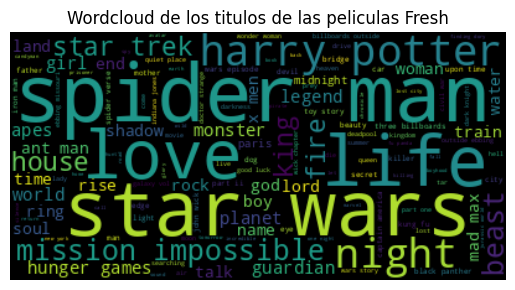

In [ ]:
createWordcloud(dfmoviescritics_fresh,"Wordcloud de los titulos de las peliculas Fresh")


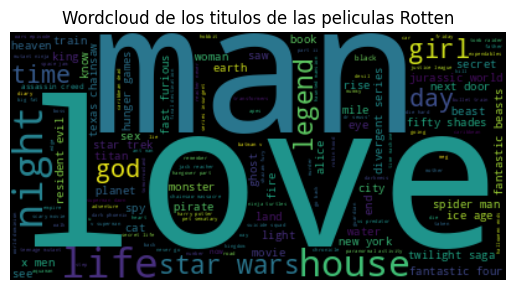

In [ ]:
createWordcloud(dfmoviescritics_rotten,"Wordcloud de los titulos de las peliculas Rotten")


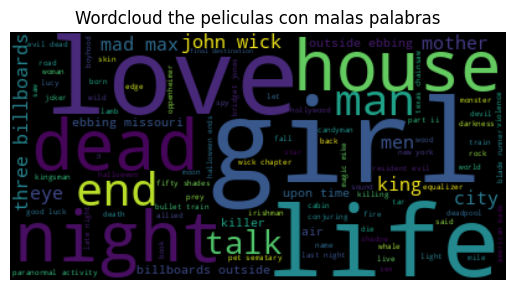

In [ ]:
createWordcloud(dfmoviesR,"Wordcloud the peliculas con malas palabras")

In [ ]:
# unicas peliculas

df_fresh_unique_movies = df_fresh.drop_duplicates(subset=['movie_id'])['movieTitle'].unique()
print(df_fresh_unique_movies)


['On the Rocks' 'Oppenheimer' 'Candyman' 'She Said' 'Sound of Metal'
 'Beauty and the Beast' 'Three Billboards Outside Ebbing, Missouri'
 'Darkest Hour' 'Avengers: Endgame' 'Moonrise Kingdom'
 'Once Upon a Time... In Hollywood' 'Us' 'Star Trek' 'Ant-Man'
 'A Star Is Born' 'The Hunger Games: Catching Fire' 'Black Panther'
 'Boyhood' 'Finding Dory' 'Tár']


ANALISIS DE SENTIMIENTO

In [ ]:
# instalando el analisis de sentimiento

!pip install -q transformers
from transformers import pipeline



In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
def compute_sentiment_score(text):
    return sentiment_pipeline(text)[0]['label']

In [ ]:
#score de sentimiento para las peliculas fresh
df_fresh['scoreSentimentFixed'] = df_fresh['quote'].apply(compute_sentiment_score)
df_fresh_sentiment = df_fresh.copy()

In [ ]:
df_fresh.head(5)

,movie_id,movieTitle,count,quote,criticPageUrl,creationDate,criticName,reviewState,critic_score,audience_score,isTopCritic,scoreSentiment,publicationName,rating_fixed,scoreSentimentFixed
0,00b00db9-cbfb-427a-bb8d-f8dd3ad3d00d,On the Rocks,490,Who among of us wouldn't want to go through a ...,/critics/aa-dowd,2020-09-28,A.A. Dowd,fresh,87.0,51.0,True,POSITIVE,AV Club,R,NEGATIVE
1,00b00db9-cbfb-427a-bb8d-f8dd3ad3d00d,On the Rocks,490,"Like a strong drink, it sneaks up on you.",/critics/adam-graham,2020-10-02,Adam Graham,fresh,87.0,51.0,True,POSITIVE,Detroit News,R,POSITIVE
2,00b00db9-cbfb-427a-bb8d-f8dd3ad3d00d,On the Rocks,490,"It's not only fun to watch them spar, but bask...",/critics/al-alexander,2020-10-19,Al Alexander,fresh,87.0,51.0,False,POSITIVE,The Patriot Ledger,R,POSITIVE
3,00b00db9-cbfb-427a-bb8d-f8dd3ad3d00d,On the Rocks,490,"Clean and character-driven, On the Rocks is a ...",/critics/alison-lanier,2021-03-16,Alison Lanier,fresh,87.0,51.0,False,POSITIVE,Bust Magazine,R,POSITIVE
4,00b00db9-cbfb-427a-bb8d-f8dd3ad3d00d,On the Rocks,490,"On the Rocks isn't a great movie, but it's one...",/critics/alison-willmore,2020-09-30,Alison Willmore,rotten,87.0,51.0,True,NEGATIVE,New York Magazine/Vulture,R,NEGATIVE


In [ ]:
df_fresh.columns

Index(['movie_id', 'movieTitle', 'count', 'quote', 'criticPageUrl',
       'creationDate', 'criticName', 'reviewState', 'critic_score',
       'audience_score', 'isTopCritic', 'scoreSentiment', 'publicationName',
       'rating_fixed', 'scoreSentimentFixed'],
      dtype='object')

In [ ]:
unique_movies = df_fresh['movieTitle'].unique()
print(unique_movies)


['On the Rocks' 'Oppenheimer' 'Candyman' 'She Said' 'Sound of Metal'
 'Beauty and the Beast' 'Three Billboards Outside Ebbing, Missouri'
 'Darkest Hour' 'Avengers: Endgame' 'Moonrise Kingdom'
 'Once Upon a Time... In Hollywood' 'Us' 'Star Trek' 'Ant-Man'
 'A Star Is Born' 'The Hunger Games: Catching Fire' 'Black Panther'
 'Boyhood' 'Finding Dory' 'Tár']


In [ ]:
df_mode_sentiment = df_fresh.groupby('movieTitle')['scoreSentimentFixed'].agg(pd.Series.mode).reset_index()
print(df_mode_sentiment)


                                   movieTitle scoreSentimentFixed
0                              A Star Is Born            POSITIVE
1                                     Ant-Man            POSITIVE
2                           Avengers: Endgame            POSITIVE
3                        Beauty and the Beast            POSITIVE
4                               Black Panther            POSITIVE
5                                     Boyhood            POSITIVE
6                                    Candyman            POSITIVE
7                                Darkest Hour            POSITIVE
8                                Finding Dory            POSITIVE
9                            Moonrise Kingdom            POSITIVE
10                               On the Rocks            POSITIVE
11           Once Upon a Time... In Hollywood            POSITIVE
12                                Oppenheimer            POSITIVE
13                                   She Said            POSITIVE
14        

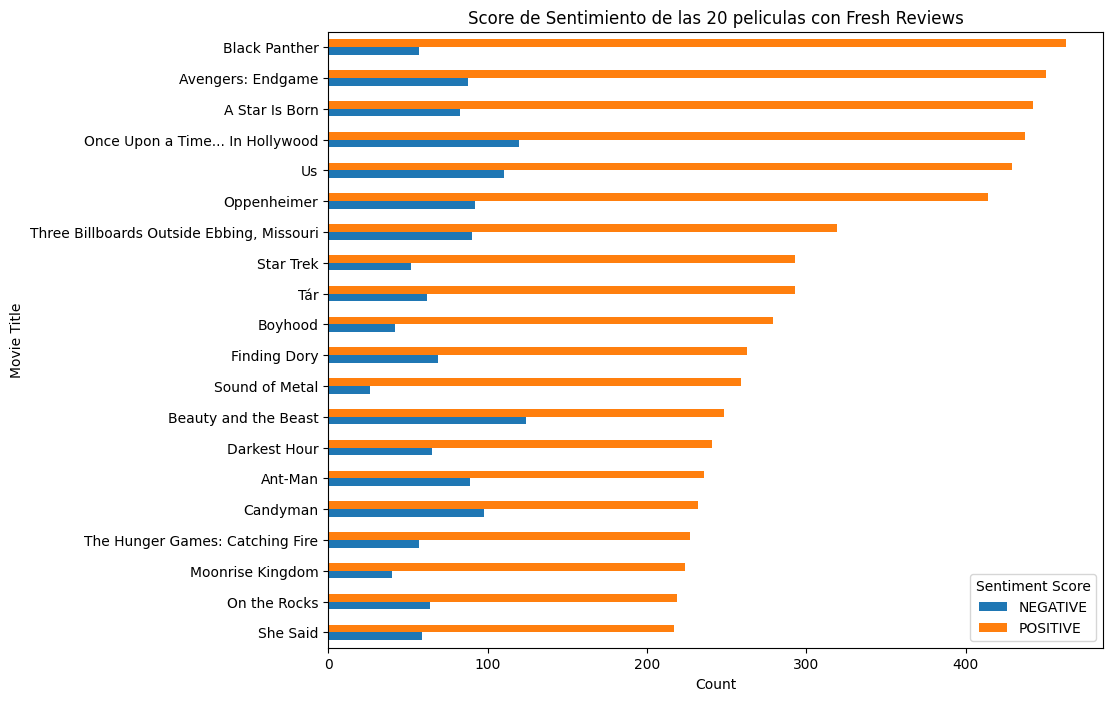

In [ ]:
#calcular el score de sentimiento por cada pelicula
sentiment_counts = df_fresh.groupby(['movieTitle', 'scoreSentimentFixed'])['scoreSentimentFixed'].count().unstack(fill_value=0)

# ordenar ascending
sentiment_counts = sentiment_counts.sort_values(by=['POSITIVE'], ascending=True)


sentiment_counts.plot(kind='barh', figsize=(10, 8))
plt.title('Score de Sentimiento de las 20 peliculas con Fresh Reviews')
plt.xlabel('Count')
plt.ylabel('Movie Title')
plt.legend(title='Sentiment Score')
plt.show()


In [ ]:
df_rotten['scoreSentimentFixed'] = df_rotten['quote'].apply(compute_sentiment_score)
df_rotten_sentiment = df_rotten.copy()

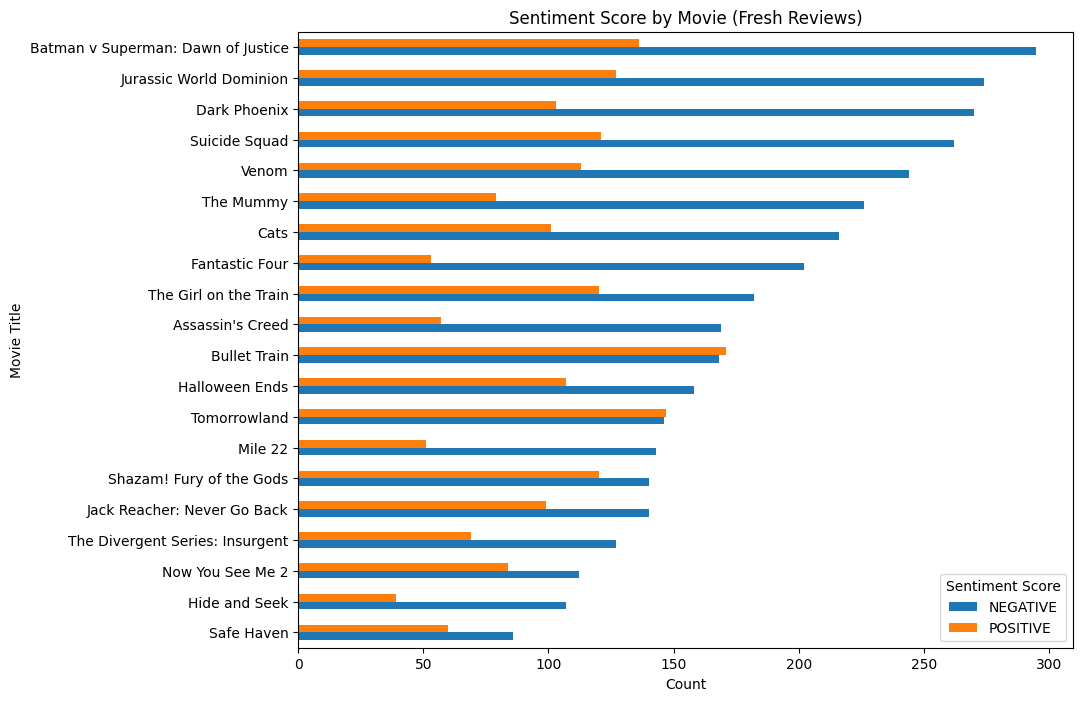

In [ ]:
#calcular el score de sentimiento por cada pelicula
sentiment_counts = df_rotten.groupby(['movieTitle', 'scoreSentimentFixed'])['scoreSentimentFixed'].count().unstack(fill_value=0)

# ordenar ascending
sentiment_counts = sentiment_counts.sort_values(by=['NEGATIVE'], ascending=True)


sentiment_counts.plot(kind='barh', figsize=(10, 8))
plt.title('Score de Sentimiento de las 20 peliculas con Rotten Reviews')
plt.xlabel('Count')
plt.ylabel('Movie Title')
plt.legend(title='Sentiment Score')
plt.show()